In [4]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.2730 - acc: 0.9160 - val_loss: 0.0593 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0909 - acc: 0.9731 - val_loss: 0.0413 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0674 - acc: 0.9795 - val_loss: 0.0347 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0556 - acc: 0.9832 - val_loss: 0.0331 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0471 - acc: 0.9857 - val_loss: 0.0297 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0433 - acc: 0.9872 - val_loss: 0.0309 - val_acc: 0.9884
Epoch 7/12
60000/60000 [=========================

Test score: 0.026977979276103632
Test accuracy: 0.9917


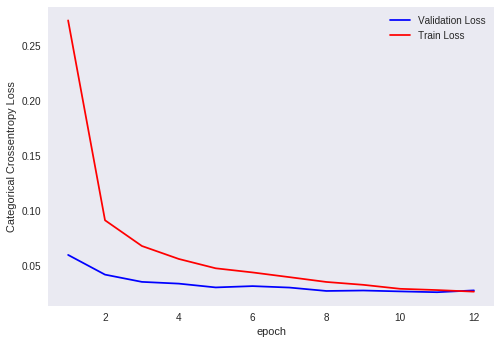

In [6]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
# plt_dynamic(x, vy, ty, ax)
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, strides=(1, 1), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.3799 - acc: 0.8769 - val_loss: 0.0607 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.1151 - acc: 0.9645 - val_loss: 0.0437 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0924 - acc: 0.9720 - val_loss: 0.0364 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0325 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0674 - acc: 0.9801 - val_loss: 0.0269 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0266 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0583 - acc: 0.9820 - val_loss: 0.0260 - 

Test score: 0.024088586140600093
Test accuracy: 0.9926


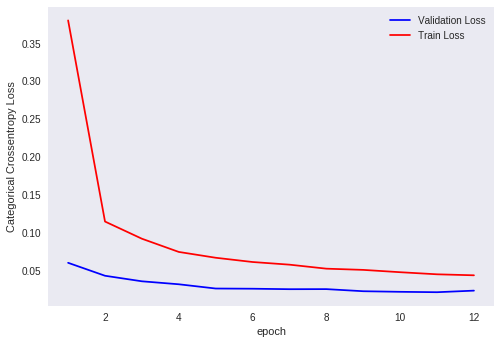

In [8]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
# plt_dynamic(x, vy, ty, ax)
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape, strides=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.7557 - acc: 0.7477 - val_loss: 0.1619 - val_acc: 0.9522
Epoch 2/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.2626 - acc: 0.9205 - val_loss: 0.1066 - val_acc: 0.9682
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.2049 - acc: 0.9398 - val_loss: 0.0847 - val_acc: 0.9744
Epoch 4/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1807 - acc: 0.9460 - val_loss: 0.0900 - val_acc: 0.9723
Epoch 5/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.1592 - acc: 0.9539 - val_loss: 0.0722 - val_acc: 0.9782
Epoch 6/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1419 - acc: 0.9585 - val_loss: 0.0684 - val_acc: 0.9777
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1321 - acc: 0.9603 - val_loss: 0.0590 - val_ac

Test score: 0.05100429020554293
Test accuracy: 0.9837


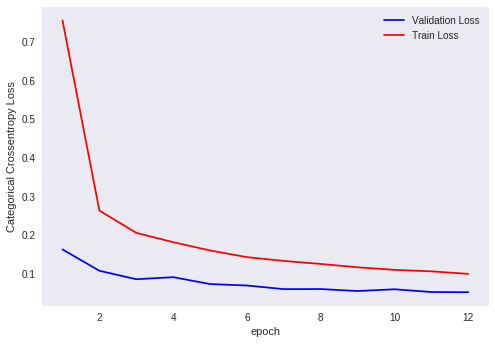

In [10]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
# plt_dynamic(x, vy, ty, ax)
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.1909 - acc: 0.9419 - val_loss: 0.0592 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0474 - acc: 0.9859 - val_loss: 0.0398 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0377 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.0330 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.0143 - acc: 0.9955 - val_loss: 0.0319 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0378 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0350 - 

Test score: 0.04266088300381594
Test accuracy: 0.9902


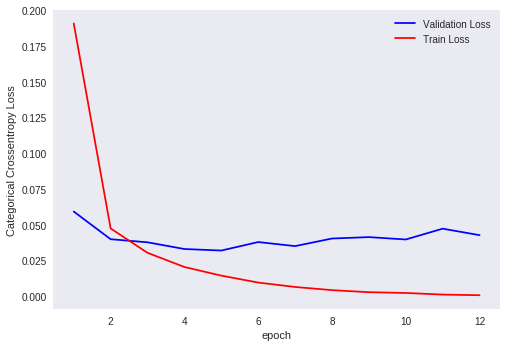

In [12]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
# plt_dynamic(x, vy, ty, ax)
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.1764 - acc: 0.9470 - val_loss: 0.0516 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0419 - acc: 0.9871 - val_loss: 0.0349 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0285 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0.0327 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0112 - acc: 0.9967 - val_loss: 0.0343 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0322 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.

Test score: 0.04509090457339796
Test accuracy: 0.9914


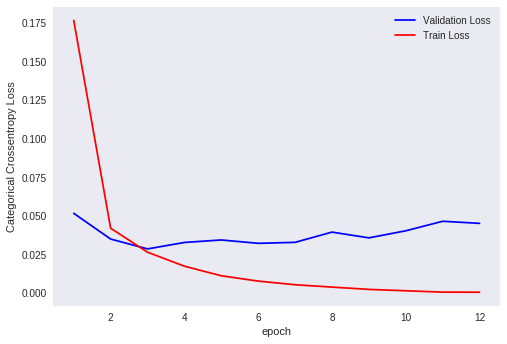

In [17]:
import matplotlib.pyplot as plt
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
# plt_dynamic(x, vy, ty, ax)
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

In [24]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Architecture", "Accuracy"]

x.add_row(["2 conv layers, kernel size=3*3, with dropout", 99.17])
x.add_row(["2 conv layers, kernel size=5*5, 3 max-pooling, strides=1*1,padding='same',different dropout rate in both layers",  99.26])
x.add_row(["2 conv layers, kernel size=7*7, 3 max-pooling, strides=2*2,padding='same',different dropout rate in both layers", 98.37])
x.add_row(["2 conv layers, kernel size=3*3, without droputs", 99.02])
x.add_row(["3 conv layers, without dropout", 99.14])

print(x)

+-----------------------------------------------------------------------------------------------------------------+----------+
|                                                   Architecture                                                  | Accuracy |
+-----------------------------------------------------------------------------------------------------------------+----------+
|                                   2 conv layers, kernel size=3*3, with dropout                                  |  99.17   |
| 2 conv layers, kernel size=5*5, 3 max-pooling, strides=1*1,padding='same',different dropout rate in both layers |  99.26   |
| 2 conv layers, kernel size=7*7, 3 max-pooling, strides=2*2,padding='same',different dropout rate in both layers |  98.37   |
|                                 2 conv layers, kernel size=3*3, without droputs                                 |  99.02   |
|                                          3 conv layers, without dropout                                      

Procedure followed

1. Splitted the MNIST dataset into train and test
2 .Converts a class vector (integers) to binary class matrix
3.Tried different architectures of CNN with dataset like with/without dropout, diffent kernel size, different convolution layers
4. Plotted the epoch vs Train/Test loss of each model